#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 6: Aplicacion de modelos SVM en data set de tips  Ibarra Ramírez Sergio </font>

Recordar que el SVM regressor tendrá como parámetros el valor de C o labda de penalización y el ancho de calle permido para el SVM 

Vamos a separar las variables independientes de la dependiente y los sets de train y test

In [1]:
import pandas as pd

tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tabla["E"] 
X = tabla.drop(["E"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Vamos a importar la libreria necesaria 

In [2]:
from sklearn.svm import SVR

Vamos a definir el modelo SVR

In [3]:
modelo_SVR = SVR(kernel='linear',C=1,epsilon=0.1)

Entrenamos el modelo SVR

In [4]:
modelo_SVR.fit(X_train, y_train)

SVR(C=1, kernel='linear')

Vamos apreecir con el modleo SVR y calcular el error 

In [5]:
from sklearn.metrics import mean_squared_error

y_pred_SVR =  modelo_SVR.predict(X_test)
RMSE_SVR = mean_squared_error(y_test,y_pred_SVR,squared=False)
print(RMSE_SVR)

0.058507063877017464


Visualización del modelo SVR con zoom en la variable D 

In [15]:
epsilon = 0.05

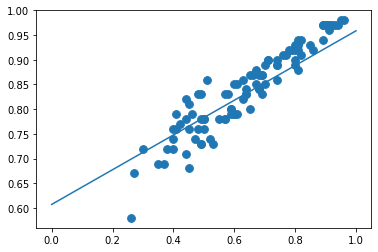

In [16]:
import matplotlib.pyplot as plt

modeloV_SVR = SVR(kernel='linear',C=1,epsilon=epsilon)

modeloV_SVR.fit(X_train["D"].to_numpy().reshape(-1, 1), y_train)

import numpy as np

x_func = np.linspace(0,1,100)
y_func = modeloV_SVR.predict(x_func.reshape(-1, 1))
x_points = X_train["D"]
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Para poder hacer una especie de 'calculo de error' se puede delimitar el y_func[0:25] al mislo len del y_test <en este caso>

In [28]:
y_func = modeloV_SVR.predict(x_func.reshape(-1, 1))
RMSE_V_SVR = mean_squared_error(y_test,y_func[0:25],squared=False)
print(RMSE_V_SVR)


0.20619215863338974


y también el MAPE DEL mape_V_SVR

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_V_SVR = mean_absolute_percentage_error(y_test,y_func[0:25])
print("MAPE:", mape_V_SVR)

MAPE: 0.22391893375928784


Y podemos graficar tambien los vectores de soporte 

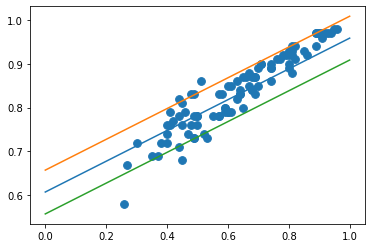

In [17]:
y_sup = y_func+epsilon 
y_inf = y_func-epsilon 
x_points = X_train["D"]
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.plot(x_func,y_sup)
ax.plot(x_func,y_inf)
ax.scatter(x_points,y_points,s=60)

Y para cada modleo se pueden obtener como tal los vectores de soporte 

In [18]:
modeloV_SVR.support_

array([ 1,  2,  5, 15, 32, 51, 60, 65, 71, 86])

En este caso nos indica´ria que son los elementos 51, 60 y 65 de nuestro training set como vectores de soporte  Y se pueden graficar también esos Vectores de Soporte

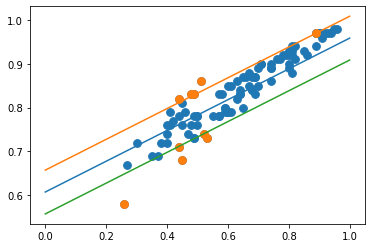

In [19]:
x_soporte = [X_train["D"].to_numpy()[i] for i in modeloV_SVR.support_]
y_soporte = [y_train.to_numpy()[i] for i in modeloV_SVR.support_]

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.plot(x_func,y_sup)
ax.plot(x_func,y_inf)
ax.scatter(x_points,y_points,s=60)
ax.scatter(x_soporte,y_soporte,s=60)